## Forecast historical prices of Bitcoin with Fedot.Industrial

In [1]:
from fedot_ind.core.repository.config_repository import DEFAULT_COMPUTE_CONFIG, DEFAULT_AUTOML_LEARNING_CONFIG

DATASET_NAME = 'bitcoin'
horizon = 12
METRIC_NAMES = ('smape', 'rmse', 'mae')

AUTOML_CONFIG = {'task': 'ts_forecasting',
                 'task_params': {'forecast_length': horizon},
                 'use_automl': True,
                 'optimisation_strategy': {'optimisation_strategy': {'mutation_agent': 'bandit',
                                                                     'mutation_strategy': 'growth_mutation_strategy'},
                                           'optimisation_agent': 'Industrial'}}

API_CONFIG = {'industrial_config': {'problem': 'ts_forecasting',
                                   'task_params': {'forecast_length': horizon}},
              'automl_config': AUTOML_CONFIG,
              'learning_config': {'learning_strategy': 'from_scratch',
                                  'learning_strategy_params': DEFAULT_AUTOML_LEARNING_CONFIG,
                                  'optimisation_loss': {'quality_loss': 'rmse'}},
              'compute_config': DEFAULT_COMPUTE_CONFIG}

In [3]:
from examples.example_utils import load_monash_dataset
bitcoin_df = load_monash_dataset('bitcoin')

2025-01-23 01:56:45,467 - PyTorch version 2.2.2 available.
2025-01-23 01:56:49,479 - ModelGapFiller - First element in the array were replaced by first known value
2025-01-23 01:56:50,234 - ModelGapFiller - First element in the array were replaced by first known value
2025-01-23 01:56:51,195 - ModelGapFiller - First element in the array were replaced by first known value
2025-01-23 01:56:52,129 - ModelGapFiller - First element in the array were replaced by first known value
2025-01-23 01:56:53,984 - ModelGapFiller - First element in the array were replaced by first known value
2025-01-23 01:57:08,152 - ModelGapFiller - First element in the array were replaced by first known value
2025-01-23 01:57:13,153 - ModelGapFiller - First element in the array were replaced by first known value
2025-01-23 01:57:14,139 - ModelGapFiller - First element in the array were replaced by first known value
2025-01-23 01:57:27,467 - ModelGapFiller - First element in the array were replaced by first known va

In [4]:
features = bitcoin_df['price'].values
target = bitcoin_df['price'][-horizon:].values

In [5]:
from fedot_ind.core.architecture.pipelines.abstract_pipeline import ApiTemplate
api_client = ApiTemplate(api_config=API_CONFIG,
                         metric_list=METRIC_NAMES)

In [6]:
dataset_dict = dict(train_data=(features, target),
                    test_data=(features, target))

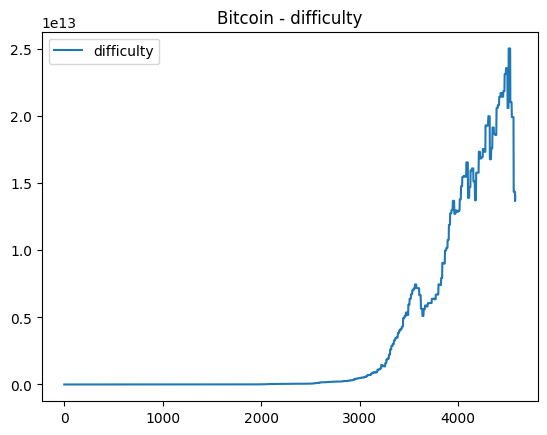

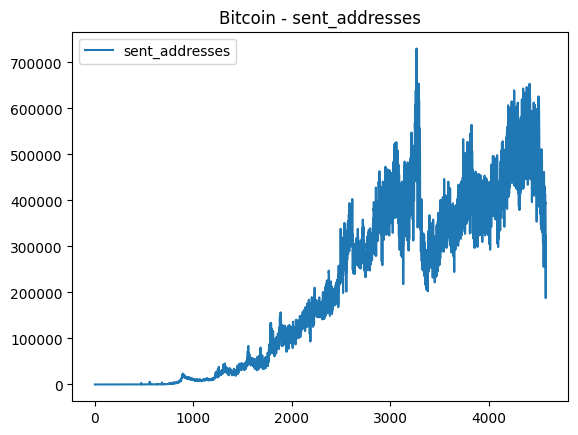

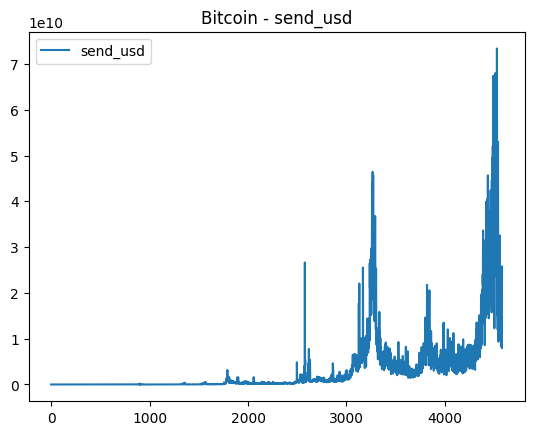

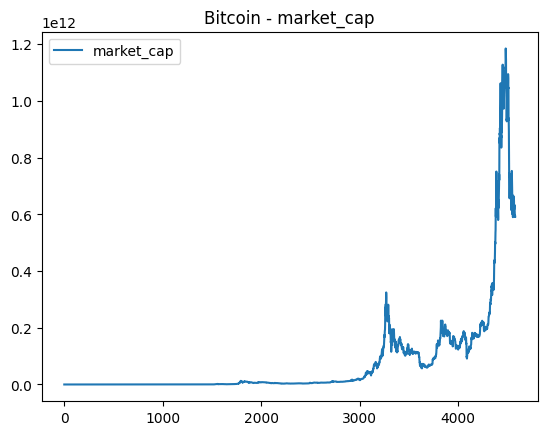

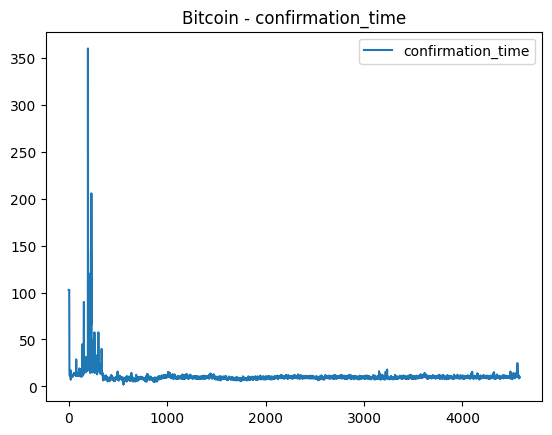

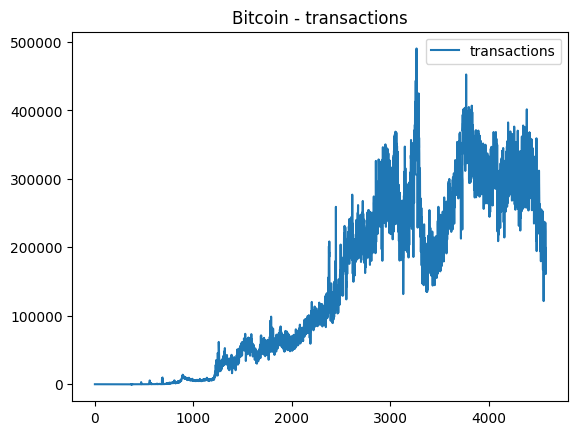

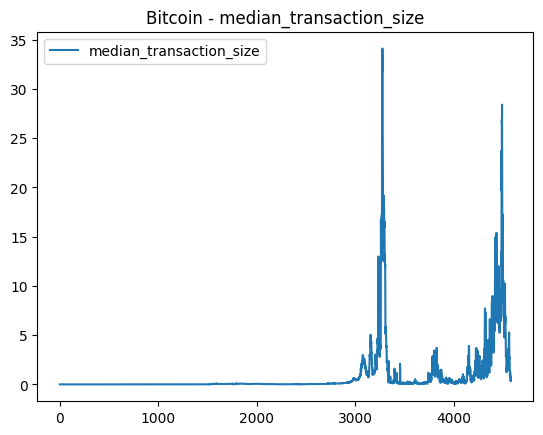

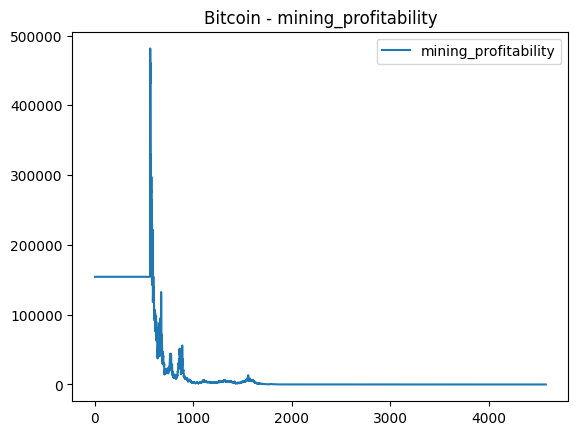

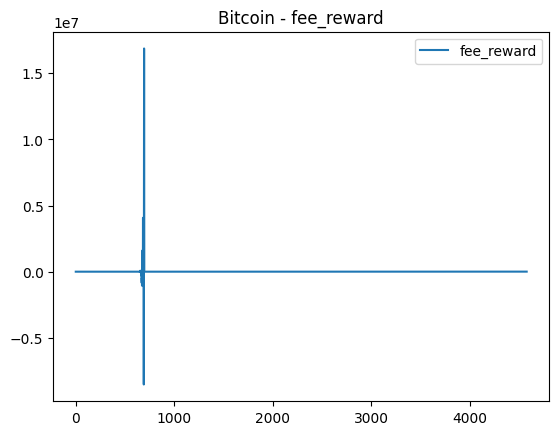

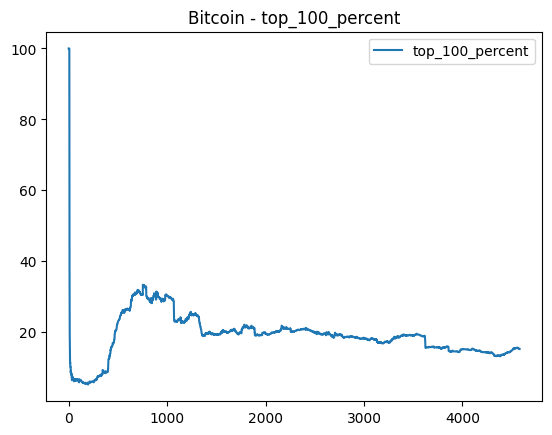

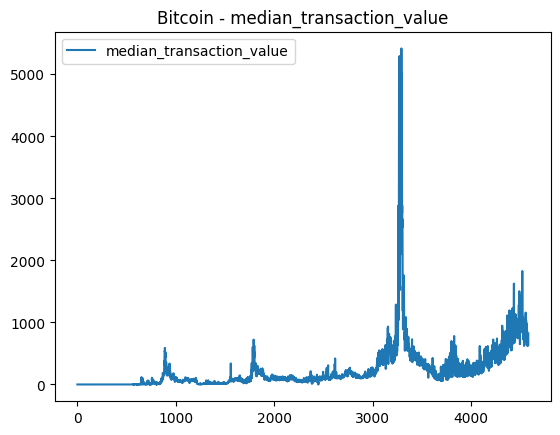

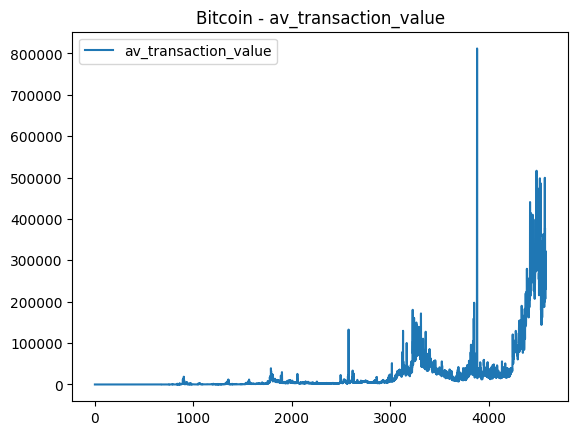

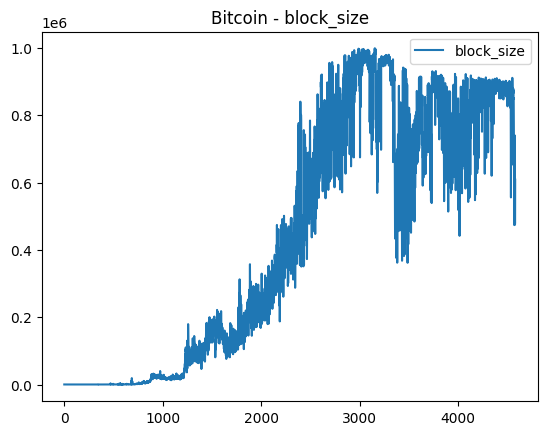

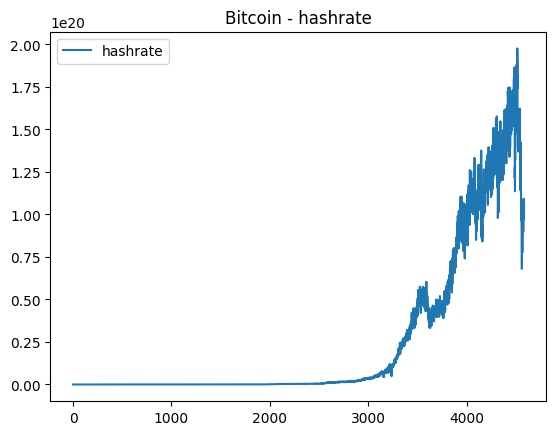

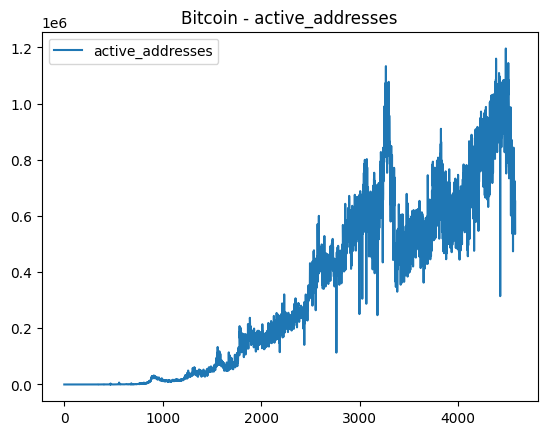

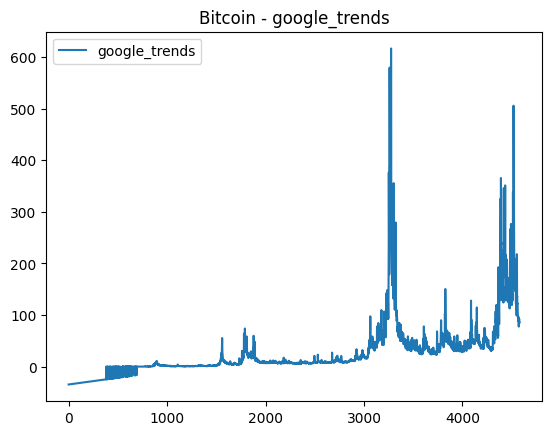

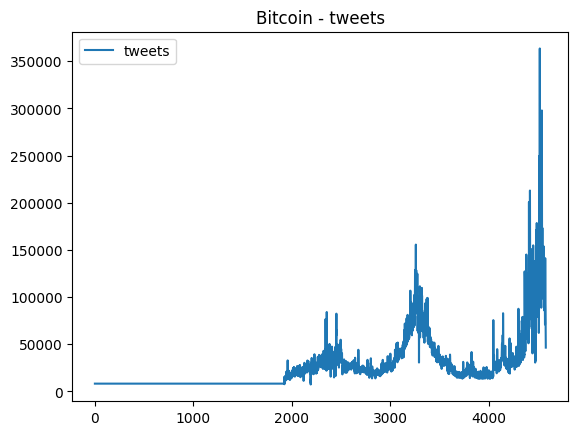

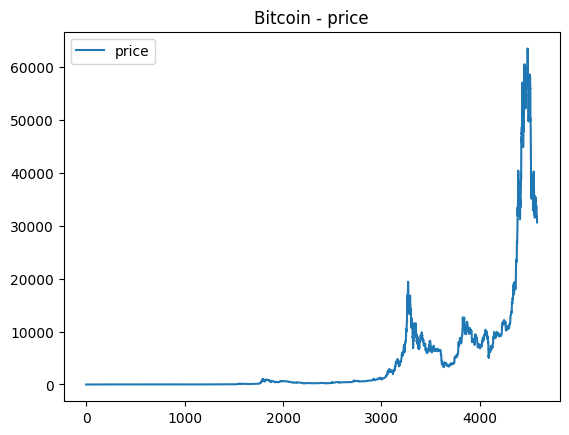

In [8]:
from matplotlib import pyplot as plt
import pandas as pd

for column in bitcoin_df.columns:
    pd.DataFrame(bitcoin_df[column]).plot(title=f'Bitcoin - {column}')
    plt.show()

In [ ]:
result_dict = api_client.eval(dataset=dataset_dict, finetune=False)

2025-01-23 02:11:46,891 - --------------------------------------------------
2025-01-23 02:11:46,892 - Initialising Industrial Repository
2025-01-23 02:11:46,893 - -------------------------------------------------
2025-01-23 02:11:46,893 - Initialising Industrial Evolutionary Optimisation params
2025-01-23 02:11:46,901 - --------------------------------------------------
2025-01-23 02:11:46,902 - Initialising Dask Server
Creating Dask Server
2025-01-23 02:11:46,922 - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2025-01-23 02:11:46,924 - State start
2025-01-23 02:11:46,930 -   Scheduler at: inproc://192.168.1.71/24173/1
2025-01-23 02:11:46,931 -   dashboard at:  http://192.168.1.71:55748/status
2025-01-23 02:11:46,931 - Registering Worker plugin shuffle
2025-01-23 02:11:46,937 -       Start worker at: inproc://192.168.1.71/24173/4
2025-01-23 02:11:46,937 -          Listening to:         inproc192.168.1.71
2025

  1%|          | 1/150 [00:00<01:38,  1.52it/s]

Epoch: 1, Steps: 282 | Train Loss: 1681474818262.2807617
Updating learning rate to 0.004116944010208179



  9%|▊         | 13/150 [00:03<00:41,  3.29it/s]

2025-01-23 02:11:51,658 - IndustrialDispatcher - 3 individuals out of 5 in previous population were evaluated successfully.


2025-01-23 02:12:25,704 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [13071.185]


[I 2025-01-23 02:12:25,720] A new study created in memory with name: no-name-e84bf8e5-0888-4cb6-bcc3-dfc6a4361449


2025-01-23 02:12:31,547 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 8.28011421669726, 'lag_2': 26.453469338937534, 'trend': 'n', 'period': 7, 'seasonal': False, 'deterministic': False}
2025-01-23 02:12:31,550 - OptunaTuner - Final metric: 12326.524
2025-01-23 02:12:31,609 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [27984.827]
2025-01-23 02:12:35,242 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 182.65785412036456, 'lag_2': 217.0758663513204, 'trend': 'c', 'period': 7, 'seasonal': True, 'deterministic': True}
2025-01-23 02:12:35,245 - OptunaTuner - Final metric: 12776.358
2025-01-23 02:12:35,308 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [45636.648]
2025-01-23 02:12:40,546 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 

Generations:   0%|          | 1/10000 [02:58<496:53:07, 178.90s/gen]

2025-01-23 02:14:46,343 - LaggedTransformationImplementation - Window size of lagged transformation was changed by WindowSizeSelector from 0 to 1920
2025-01-23 02:14:46,344 - LaggedTransformationImplementation - Window size of lagged transformation was changed by WindowSizeSelector from 0 to 1200
2025-01-23 02:14:46,344 - LaggedTransformationImplementation - Window size of lagged transformation was changed by WindowSizeSelector from 0 to 624
2025-01-23 02:14:46,345 - LaggedTransformationImplementation - Window size of lagged transformation was changed by WindowSizeSelector from 0 to 1416
2025-01-23 02:14:53,034 - IndustrialDispatcher - 11 individuals out of 12 in previous population were evaluated successfully.
2025-01-23 02:14:54,345 - IndustrialDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-01-23 02:14:54,347 - IndustrialEvoOptimizer - Successful reproduction
2025-01-23 02:14:55,087 - LaggedTransformationImplementation - Window size of la

Generations:   0%|          | 2/10000 [03:11<225:35:57, 81.23s/gen] 

2025-01-23 02:14:59,771 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [4331.554]
2025-01-23 02:15:03,771 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 18.15824861875934, 'lag_2': 298.4799972764755, 'trend': 't', 'period': 14, 'seasonal': True, 'deterministic': True}
2025-01-23 02:15:03,775 - OptunaTuner - Final metric: 3336.586
2025-01-23 02:15:04,271 - IndustrialDispatcher - 2 individuals out of 3 in previous population were evaluated successfully.
2025-01-23 02:15:05,116 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [10376.741]
2025-01-23 02:15:11,606 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 2.902647153485704, 'lag_2': 157.08317837569456, 'trend': 'c', 'period': 14, 'seasonal': True, 'deterministic': False}
2025-01-23 02:15:11,610 - OptunaTuner - Final metr

Generations:   0%|          | 3/10000 [03:25<140:14:35, 50.50s/gen]

2025-01-23 02:15:13,768 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [10376.741]
2025-01-23 02:15:15,244 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [12504.478]
2025-01-23 02:15:19,313 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [2514.292]
2025-01-23 02:15:29,557 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 154.51748385460502, 'lag_2': 19.09104312817432, 'trend': 'c', 'period': 14, 'seasonal': True, 'deterministic': True}
2025-01-23 02:15:29,598 - OptunaTuner - Final metric: 1882.460
2025-01-23 02:15:29,636 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 19.72842292835159, 'lag_2': 564.3857566131237, 'trend': 't', 'period': 21, 'seasonal': True, 'deterministic': False}
2025-01-23 02:15:2

Generations:   0%|          | 4/10000 [04:04<126:51:37, 45.69s/gen]

2025-01-23 02:15:53,440 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [4331.554]
2025-01-23 02:15:54,746 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [4331.554]
2025-01-23 02:16:03,739 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 5.104923091606849, 'lag_2': 161.40417398484698, 'trend': 't', 'period': 14, 'seasonal': True, 'deterministic': True}
2025-01-23 02:16:03,793 - OptunaTuner - Final metric: 1209.531
2025-01-23 02:16:03,989 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 6.05722325550546, 'lag_2': 689.2182978673499, 'trend': 'n', 'period': 21, 'seasonal': False, 'deterministic': False}
2025-01-23 02:16:03,994 - OptunaTuner - Final metric: 2579.158
2025-01-23 02:16:04,880 - IndustrialDispatcher - 6 individuals out of 8 in previous population were evaluated su

Generations:   0%|          | 5/10000 [04:24<101:49:38, 36.68s/gen]

2025-01-23 02:16:13,941 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [8113.137]
2025-01-23 02:16:13,993 - OptunaTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 7, 'lag_2': 12} 
Initial metric: [6890.675]
2025-01-23 02:16:29,103 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 2.8644740358610044, 'lag_2': 24.22131108358286, 'trend': 'c', 'period': 7, 'seasonal': False, 'deterministic': True}
2025-01-23 02:16:29,143 - OptunaTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [ar]}
ar - {'lag_1': 10.408716158698876, 'lag_2': 163.5310215991885, 'trend': 'ct', 'period': 365, 'seasonal': True, 'deterministic': False}
2025-01-23 02:16:29,145 - OptunaTuner - Final metric: 1127.710
2025-01-23 02:16:29,147 - OptunaTuner - Final metric: 1921.493
2025-01-23 02:16:50,612 - MetricsObjective - Objective evaluation error for graph {'depth': 1, 'length': 1, '

In [ ]:
result_dict['metrics']

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
border = 200
eigen = result_dict['labels']
plt.close()
real_values = features
if len(real_values) > border:
    real_values = real_values[-border:]
indicies = np.arange(real_values.shape[0])

In [ ]:
plt.xlabel('Time index')
plt.ylabel('Series values')
plt.title('Forecating by Industrial')
plt.plot(real_values)

real_last_value = real_values[-horizon - 1]
plt.plot(indicies[-horizon - 1:],
         np.insert(eigen, 0, real_last_value), label='forecast')

plt.grid()
plt.legend()